# 🚗 Machine Learning Case Study: Optimizing Carsharing Services

## 📌 Introduction

In this notebook, we walk through a real-world machine learning pipeline — from problem definition to model evaluation — using a case study on **carsharing service optimization**.

As a data analyst or aspiring ML engineer, understanding the end-to-end flow of building predictive models is key. This project focuses on practicing and consolidating core skills around:

### 🧠 What You’ll Learn

- How to **select the best model** based on relevant evaluation metrics.
- How to **prepare, preprocess, and train data** effectively.
- How to **evaluate model performance** and tie it back to business goals.
- How to **draw actionable insights** from predictions to optimize operations.

Throughout this project, you'll simulate what a real analyst does: check assumptions, compare model types, measure accuracy, and suggest improvements.

This case study is more than a technical exercise — it's a decision-making process. You're not just building a model; you're proposing a solution that improves a company's **carsharing strategy**.

Let’s dive into the pipeline and make data work for better mobility solutions!

___

# 🧠 Predicting Fuel Consumption for Carsharing Optimization

## 🚗 Business Context

In this case study, you are a data analyst at a successful **carsharing company**. As part of your mission to increase operational efficiency, you're tackling one key question:  
**Which vehicle models offer the best fuel performance per 100 kilometers?**

While customer acquisition is crucial, optimizing operational costs like **fuel consumption** can significantly improve **profit margins**. Your goal is to build a machine learning model that estimates fuel usage based on various vehicle specifications — helping your team make smarter purchasing decisions.

---

## 🔍 Problem Definition

- **Business Goal**: Reduce operational costs by selecting the most fuel-efficient car models.
- **ML Task Type**: Supervised Learning – **Regression**
- **Target Variable**: Fuel consumption per 100 kilometers.
- **Features**: Vehicle specifications such as engine type, weight, size, horsepower, etc.
- **Value to the Business**: Helps procurement and operations teams optimize fleet composition and lower long-term costs.

---

## 📊 Key Questions

- What factors most influence a car's fuel consumption?
- Can we predict fuel usage accurately using existing vehicle parameters?
- Which models should the company invest in based on predicted performance?

---

## 🧪 ML Approach Summary

| Step                        | Description                                        |
|-----------------------------|----------------------------------------------------|
| 📦 Data                     | Fuel consumption logs, vehicle specs, monthly stats |
| ⚙️ Task Type                | Regression                                         |
| 📏 Metrics                  | R², RMSE, MAPE                                     |
| 🧠 Algorithms               | Linear Regression, Random Forest, Gradient Boosting|
| ⏱️ Time Series Structure?  | Not required                                       |
| 🧮 Output                   | Fuel usage (liters/100km) for each vehicle         |

---

## ✅ Why This Matters

This project simulates the **real-world decision-making process** of a machine learning analyst. From translating business needs into a predictive task, selecting appropriate algorithms, validating models, and finally **delivering insights** that can drive **cost-saving strategies**.
___

## 🔎 Exploratory Data Analysis (EDA)

Before training any machine learning model, it’s crucial to understand the dataset you're working with. In this stage, our primary goal is to **evaluate data quality**, **understand feature distributions**, **identify correlations**, and **spot potential anomalies**.

This initial exploration lays the groundwork for feature engineering, data cleaning, and model selection. It also allows us to formulate hypotheses about the relationships between vehicle attributes and fuel consumption.

---

### 🧭 Key Objectives

1. **Assess data quality**  
   - How large is the dataset?  
   - Are there missing values?  
   - Which features require preprocessing?

2. **Identify feature types**  
   - Are the features numerical or categorical?  
   - Will categorical variables need encoding?

3. **Examine distributions and relationships**  
   - Are there outliers?  
   - Which features correlate strongly with the target (fuel consumption)?

4. **Understand the business context behind features**  
   - Even if anonymized, can the feature semantics be inferred?  
   - What are the most likely contributors to fuel efficiency?

5. **Check for time-related patterns**  
   - Does the target variable vary over time?  
   - Will we need to apply time-series-aware validation methods?

---

By answering these questions and exploring visualizations (e.g., histograms, scatter matrices, heatmaps), we can better prepare the data for the modeling stage and avoid costly mistakes later in the pipeline.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# lee los datos de los automóviles y su consumo de combustible desde el archivo CSV
cars = pd.read_csv('datasets/auto_cons_us.csv')

# muestra su tamaño y las primeras 5 filas
print(cars.shape)
cars.head()

# consigue la información resumida del dataset
cars.info()

(398, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Fuel consumption     398 non-null    int64  
 1   # of cylinders       398 non-null    int64  
 2   Engine displacement  398 non-null    int64  
 3   Engine power         392 non-null    float64
 4   Weight               398 non-null    int64  
 5   Acceleration         398 non-null    float64
 6   Year                 398 non-null    int64  
 7   Origin               398 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 25.0+ KB


Most of the features are numerical; only the "Origin" column is categorical.  
The situation with missing values is acceptable — there are only six of them, all in the "Engine power" feature.
___

## 🧠 EDA: Hypothesis Generation

Once you've gained a basic understanding of the features, it's time to dive deeper and explore them further.

### 🔍 Explore Numeric Feature Distributions

- Plot histograms for all numeric features to detect outliers and understand their distributions. Ideally, features should follow a roughly normal distribution.
- If your dataset has a time component, visualize how features evolve over time. This is crucial for industrial or time-dependent processes, as it reveals whether feature behavior changes, potentially invalidating your model over time.

### 🚨 Identify Outliers and Correlation

- Use histograms and scatter plots to identify extreme values.
- Compute the **correlation matrix** using `.corr()` and visualize it using a **heatmap**:
  
  ```python
  cm = df.corr()
  sns.heatmap(cm, annot=True, square=True)

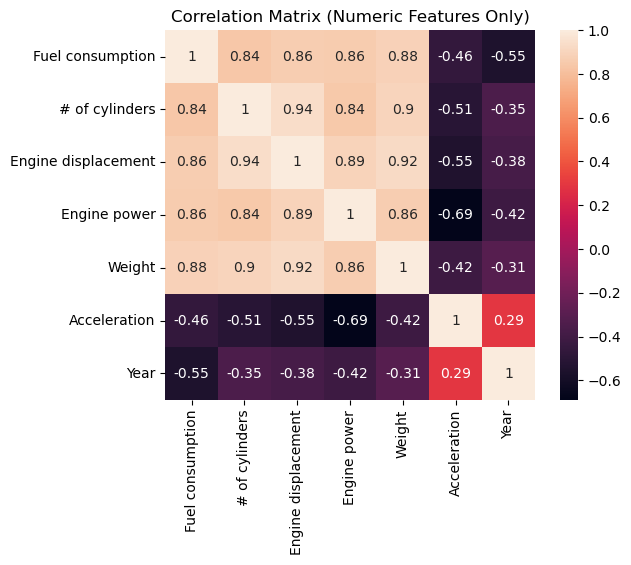

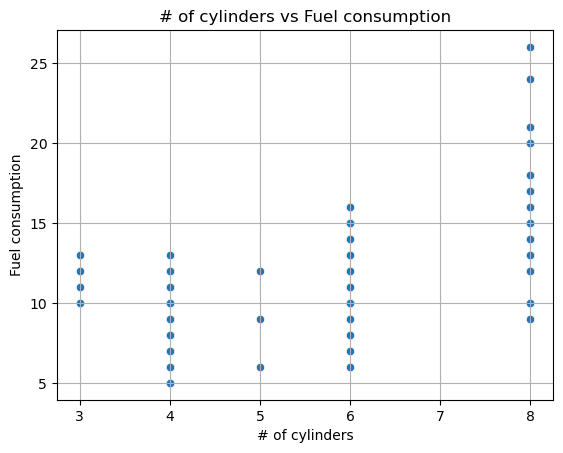

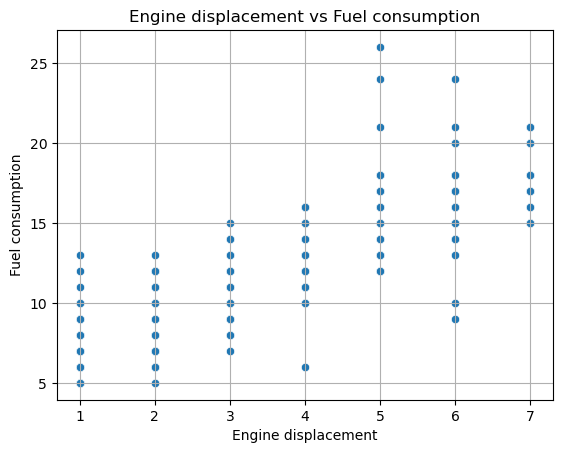

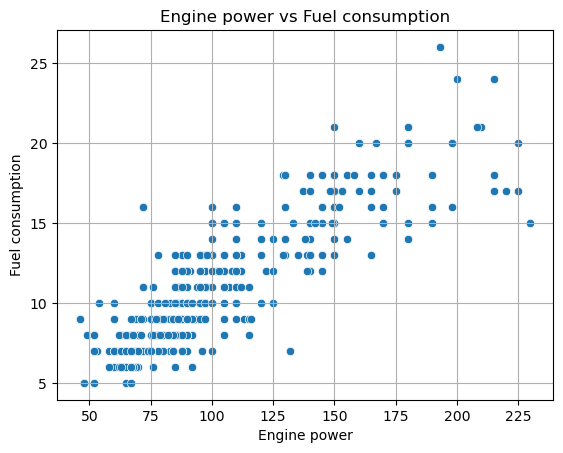

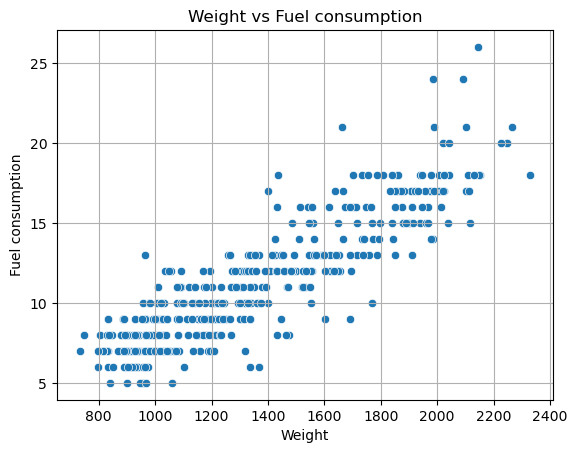

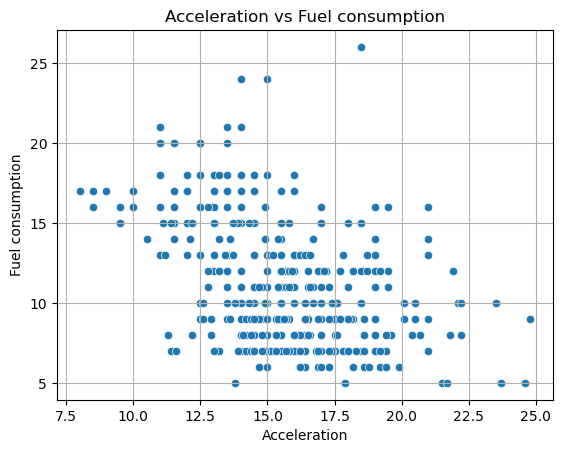

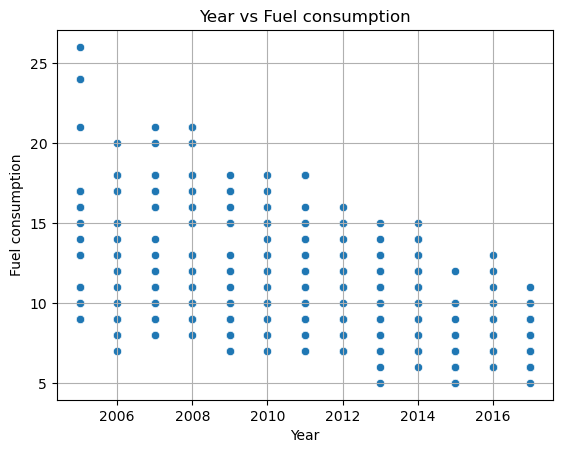

In [9]:
# Compute correlation matrix using only numeric columns
numeric_cols = cars.select_dtypes(include='number')  # Filter numeric columns only
cm = numeric_cols.corr()

# Plot heatmap of correlation matrix
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, square=True)
ax.set_ylim(len(cm), 0)  # Fix heatmap cutoff issue
plt.title('Correlation Matrix (Numeric Features Only)')
plt.show()

# Plot scatterplots of each feature vs. the target
for col in numeric_cols.drop(columns='Fuel consumption').columns:
    sns.scatterplot(x=cars[col], y=cars['Fuel consumption'])
    plt.title(f'{col} vs Fuel consumption')
    plt.xlabel(col)
    plt.ylabel('Fuel consumption')
    plt.grid(True)
    plt.show()

## 📌 Conclusion

We did not observe any clear bias or extreme outliers in the distribution plots — that’s great! This means we can proceed confidently to build a predictive model with this data.

Looking at the correlation matrix and scatter plots, we already see that about half of the features are strongly correlated with the target variable. It appears likely that the number of cylinders, high engine power, engine displacement, and vehicle weight contribute to increased fuel consumption.

This isn't a groundbreaking insight — but it's reassuring that the results are logical and aligned with domain knowledge. With just exploratory data analysis (EDA), even before building a model, we’ve identified the key factors influencing **Fuel Consumption**.

**💡 Moral of the story: Never skip EDA! It often tells you more than you think.**

## 🧹 Data Preprocessing: Key Steps Before Modeling

Once you understand the structure and challenges of your dataset (e.g., missing values, outliers, categorical features), you're ready to preprocess it before feeding it into your machine learning model.

The most common steps are:

---

### 1. 🧱 Handling Missing Values

Several strategies exist:

- **Drop rows with missing values**  
  Useful when you have a large dataset and very few missing values.

- **Forward fill (ffill)**  
  For time series data, fill missing values with the last known value.

- **Replace with mean/median**  
  Common when there is no time-related structure and missingness is random.

- **Replace with zeros or "unspecified" labels**  
  For tree-based models, missing values can be informative. In categorical variables, replacing with `"unspecified"` can preserve useful signals.

⚠️ Always make sure imputed values won’t introduce bias or noise into your model!

---

### 2. 🚨 Handling Outliers

Outliers can distort linear models significantly. Standard steps include:

- Define thresholds (e.g., below 5th or above 95th percentiles)
- Replace outliers with max/min/median values
- Drop outliers from the dataset if sample size allows

---

### 3. 🏷️ Encoding Categorical Features

There are two main encoding methods:

- **Label Encoding**  
  Converts string labels into numeric values, but introduces ordinal relationships (e.g., Moscow = 0, Berlin = 1).

```python
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['City'] = encoder.fit_transform(df['City'])

In [10]:
# Display the original shape and first 5 rows
print("Original dataset shape:", cars.shape)
print(cars.head())

# Drop rows with missing values and show the updated shape
cars.dropna(inplace=True)
print("Updated dataset shape after dropping missing values:", cars.shape)

Original dataset shape: (398, 8)
   Fuel consumption  # of cylinders  Engine displacement  Engine power  \
0                13               8                    5         130.0   
1                16               8                    6         165.0   
2                13               8                    5         150.0   
3                15               8                    5         150.0   
4                14               8                    5         140.0   

   Weight  Acceleration  Year Origin  
0    1589          12.0  2005     US  
1    1675          11.5  2005     US  
2    1559          11.0  2005     US  
3    1557          12.0  2005     US  
4    1564          10.5  2005     US  
Updated dataset shape after dropping missing values: (392, 8)


## 🧹 Data Preprocessing: Handling Missing Values

Before training any machine learning model, it's essential to clean the data. During the exploratory data analysis (EDA), we discovered that the "Engine power" feature had six missing values. While this might raise concerns, these account for only about **1.5% of the dataset**, which is a small enough proportion to consider dropping without significant loss of information.

Instead of filling or imputing these missing values (which can introduce bias or require additional logic), we opted for a simpler solution: removing the rows entirely. This approach is both efficient and effective for small-scale missing data.

---

## ✅ Conclusion

We sacrificed **1.5% of the dataset**, but saved time and avoided introducing potential noise through imputation. This quick win streamlines the preprocessing phase and keeps the dataset clean and ready for modeling. In scenarios where data loss is minimal and random, dropping rows can be a practical and scalable solution.